#Simple Linear Regression on Salaray Dataset

URL to the original dataset: [Kaggle Salary Dataset](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data)

Problem Statement: Based on the work experience we want to predict the expected salary.

#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

#Load the data

The dataset it hosted on my Github Repo so we can fetch it easily:
[Salary Dataset](https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/Salary_dataset.csv)

In [ ]:
url = 'https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/Salary_dataset.csv'

We didn´t cover the python [pandas](https://pandas.pydata.org/) library yet - but we will learn it "on the fly" ;-)

##Pandas

Pandas is an open-source data analysis and manipulation library for Python. It provides data structures and functions necessary to manipulate structured data, including capabilities for cleaning, exploring, and transforming data.

Pandas is built on top of two core Python libraries, Matplotlib for data visualization and NumPy for mathematical operations.

Key features of pandas include:
   
   - DataFrame object to hold data in a flexible way and allows manipulation.
   
   - Tools for reading and writing data between multiple formats: CSV, text files, SQL databases, Excel files, and HDF5 format.
   
   - Handling for missing data and NaN values.
   
   - Operations for manipulating data: filtering, insertion, deletion.
   
   - Merging and joining of datasets.
   
   - Reshaping and pivoting of data sets.
   
   - Grouping and aggregation of data for data transformation.

Pandas is also a foundational library for data science in Python, and it is often used in combination with other data science packages like Matplotlib, SciPy, and scikit-learn.

Load the data with `pd.read_csv()` function.



In [ ]:
dataset = pd.read_csv(url)

To check if the dataset is imported correctly, use: `.head()`.

With `.head()` we plot the first 5 rows (n=5 default).


In [ ]:
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Let´s plot the first 10 rows.

In [ ]:
dataset.head(n=10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


#Clean the data

We want to perform some transformation on the given dataset:


*   Delete the "Unnamed" coloumn (we don´t need it and it is not meaningful for the problem)
*   Convert salaries to 1000$
*   Rename 'Salary' and 'YearsExperience' column and include the units



**Delete 'Unnamed: 0' column**

Here the `drop` function is used to remove the column named 'Unnamed: 0' from the DataFrame. The argument `inplace=True` ensures that the DataFrame is updated without creating a copy.

In [ ]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


**Convert salaries**

This line takes the column labeled 'Salary' of the DataFrame `data` and divides every entry by 1000. This could be used for instance to convert salaries from a smaller unit (like dollars) to a larger one (like thousands of dollars).

In [ ]:
dataset['Salary'] = dataset['Salary']/1000
dataset.head()

,YearsExperience,Salary
0,1.2,39.344
1,1.4,46.206
2,1.6,37.732
3,2.1,43.526
4,2.3,39.892


**Rename columns**

The `rename` function is used to rename the column labeled 'YearsExperience' to 'Experience (years)' and the column 'Salary' to 'Salary (1000 $)'. Again 'inplace=True' updates the DataFrame without creating a copy.

In [ ]:
dataset.rename(columns={"YearsExperience": 'Experience (years)',
             'Salary': 'Salary (1000 $)'}, inplace=True)
dataset.head()

,Experience (years),Salary (1000 $)
0,1.2,39.344
1,1.4,46.206
2,1.6,37.732
3,2.1,43.526
4,2.3,39.892


#Check missing values

This line of code checks and prints the number of missing (null) values in your dataset and the shape (number of rows and columns) of your dataset

1. `dataset.isnull()`: This function checks whether each value in the dataset is missing (denoted as NaN in pandas). This returns a pandas DataFrame where each entry is either True (if the entry was missing) or False.

2. `value_counts()`: This function counts the number of occurrences of each unique value in the DataFrame. In this case, it will return the number of True values (number of missing values) and False values (number of present values) in the dataset.

3. `dataset.shape`: This gives you the number of rows and columns in the dataset.


In [ ]:
print(dataset.isnull().value_counts())
print(dataset.shape)

Experience (years)  Salary (1000 $)
False               False              30
dtype: int64
(30, 2)


#Visualize/Inspect the Data

**Get Basic descriptive statistics of the dataset**

Here's what it does:

- It provides a summary of the central tendency, dispersion and shape of the dataset's distribution, excluding NaN values.
- By default, it provides the summary statistics of the columns which have numerical data types. It doesn't take into account columns with data types like objects or strings.

These are the statistics that the `dataset.describe()` method typically provides:

- count: number of non-null (or non-NA) values in each column
- mean: the average of the values in each column
- std: standard deviation, which measures how spread out numbers in the column are.
- min: the smallest value in each column
- 25%: the value below which 25% of the data fall (also known as the first quartile)
- 50%: the value below which 50% of the data fall (also known as the median)
- 75%: the value below which 75% of the data fall (also known as the third quartile)
- max: the largest value in each column

In [ ]:
dataset.describe()

,Experience (years),Salary (1000 $)
count,30.000000,30.00000
mean,5.413333,76.00400
std,2.837888,27.41443
min,1.200000,37.73200
25%,3.300000,56.72175
50%,4.800000,65.23800
75%,7.800000,100.54575
max,10.600000,122.39200


#Feature Selection

**Correlation between Experience & Salary**

In Pandas, the `corr()` function is used to find the pairwise correlation of all columns in the dataframe. It computes the standard correlation coefficient (also known as [the Pearson product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)) between all pairs of numeric columns in the DataFrame.

Here's what it does:

- The output of the `dataset.corr()` command is a DataFrame where the cell at the intersection of row `i` and column `j` represents the correlation between the `i-th` and `j-th` column of the 'dataset'.

- The correlation coefficients range from -1 to 1, inclusive.

- A correlation of -1 indicates a perfect negative correlation, which means that as one variable increases, the other decreases.

- A correlation of 1 indicates a perfect positive correlation, which means that both variables move in the same direction together.

- A correlation of 0 means there is no linear relationship between the variables.

The `corr()` function is a powerful exploratory tool in data analysis because it allows you to see which variables in your dataset are most correlated to each other. You might then choose to focus on these variables in your further analysis or predictive modeling.

In [ ]:
dataset.corr()

,Experience (years),Salary (1000 $)
Experience (years),1.000000,0.978242
Salary (1000 $),0.978242,1.000000


Make it easier to read using [seaborn](https://seaborn.pydata.org/) library.

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Here are some key differences between Matplotlib and Seaborn:

1. **Ease of Use**: Seaborn comes with numerous customized themes and a high-level interface for creating beautiful and informative statistical graphics. It is easier to generate certain kinds of plots in Seaborn than in Matplotlib, including heat maps, time series, and violin plots.

2. **Working with DataFrames**: Seaborn integrates well with pandas DataFrames, making it easier to plot data directly from your DataFrame.

3. **Better Defaults**: Seaborn also has better aesthetics and built-in themes that improve the default Python data visualization experience.

4. **Statistical Analysis**: While Matplotlib traditionally only visualizes data, Seaborn comes coupled with some built-in data analysis tools like correlation, regression etc., thus integrating both the tasks in its workflow.

5. **Flexibility**: Matplotlib is more flexible than Seaborn. Seaborn simplifies many tasks and has many complex plot types, but for more control and customization of plots - Matplotlib is the library to use.

## Code Explanation

1. `plt.figure(figsize=(8,6))`: This line creates a figure with a size of (8,6) inches using Matplotlib's `figure()` function.
2. `sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')`: This line generates a heatmap of the correlation matrix using Seaborn's `heatmap()` function and sets the color map to "coolwarm". The `annot` parameter is set to True to display annotations on the heatmap.
3. `plt.show()`: This line displays the figure using Matplotlib's `show()` function.

## Code

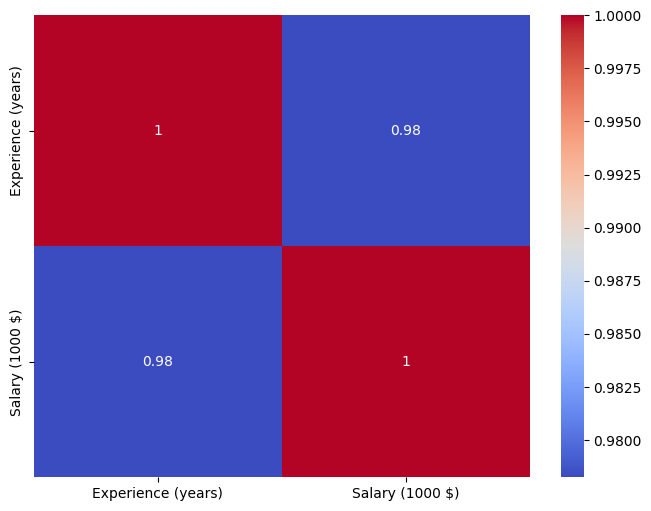

In [ ]:
# Create a figure with a size of (8,6) inches
plt.figure(figsize=(8,6))  # Set the size of the figure to be (8,6) inches

# Generate a heatmap of the correlation matrix using Seaborn's heatmap function
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')  # Generate a heatmap of the correlation matrix with annotations and a color map of 'coolwarm'

# Show the plot
plt.show()  # Display the figure

## Bring Data into right shape

Reshape the data, so we can train the Regression model. The model cannot work with `pandas` dataframes so we have to convert it into `numpy` arrays.

Remember: We want to predict the salary, based on the experience.

*   X = Experience
*   Y = Salary



In [ ]:
# Create a NumPy array from the 'Salary (1000 $)' column in the dataset
y = np.array(dataset['Salary (1000 $)']).reshape((-1, 1)) # Reshape the data into a 2D array with one column

# Print the first five instances of the data
print(f'First five instances: \n {y[:5]}') # Print the first five elements of the data

# Print the shape of the data
print(f'Shape of the data: \n {y.shape}') # Print the shape of the data (number of rows and columns)

# Print the type of the data
print(f'Type of the data: {type(y)}') # Print the type of the data (e.g., numpy.ndarray)

First five instances: 
 [[39.344]
 [46.206]
 [37.732]
 [43.526]
 [39.892]]
Shape of the data: 
 (30, 1)
Type of the data: <class 'numpy.ndarray'>


In [ ]:
# Create a NumPy array from the 'Experience (years)' column of the dataset
x = np.array(dataset['Experience (years)']).reshape((-1, 1))

# Print the first five instances of the data
print(f'First five instances: \n {x[:5]}')

# Print the shape of the data
print(f'Shape of the data: \n {x.shape}')

# Print the type of the data
print(f'Type of the data: {type(x)}')

First five instances: 
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
Shape of the data: 
 (30, 1)
Type of the data: <class 'numpy.ndarray'>


## Code Explanation

1. `plt.figure(figsize=(10, 6)) # creates a new figure with the given size`: This line creates a new Matplotlib figure with a size of (10, 6) inches using the `figure()` function.
2. `plt.scatter(x, y)`: This line generates a scatter plot of the `Experience (years)` column versus the `Salary (1000 $)` column using the `scatter()` function.
3. `plt.title('Salary vs Experience')`: This line sets the title of the plot to `Salary vs Experience` using the `title()` function.
4. `plt.xlabel('Experience (years)')`: This line sets the label of the x-axis to "Experience (years)" using the `xlabel()` function.
5. `plt.ylabel('Salary (1000 $)')`: This line sets the label of the y-axis to `Salary (1000 $)` using the `ylabel()` function.
6. `plt.grid()`: This line adds a grid to the plot using the `grid()` function.
7. `plt.show()`: This line displays the plot using the `show()` function.

## Code

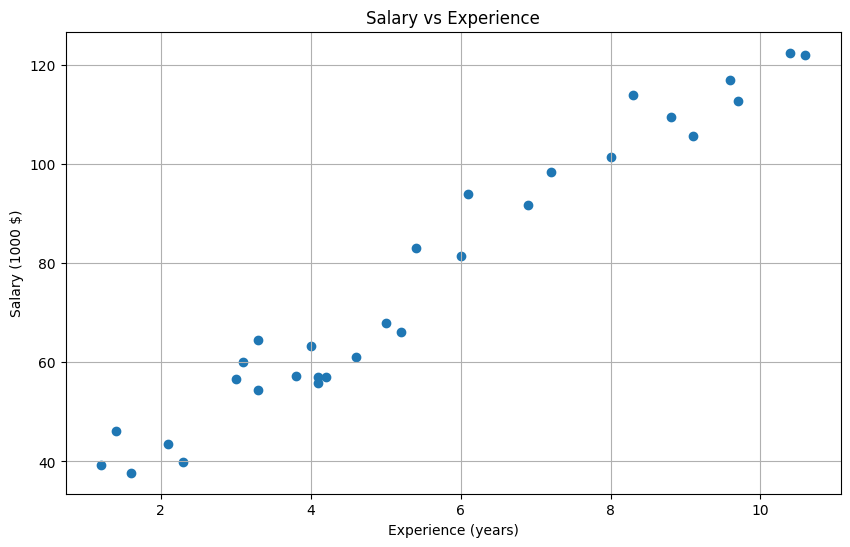

In [ ]:
# Create a scatter plot of experience vs salary
plt.figure(figsize=(10, 6)) # Create a new figure with size (10, 6) inches
plt.scatter(x, y) # Generate scatter plot of experience vs salary
plt.title('Salary vs Experience') # Set title of the plot
plt.xlabel('Experience (years)') # Set label of x-axis
plt.ylabel('Salary (1000 $)') # Set label of y-axis
plt.grid() # Add grid to the plot
plt.show() # Display the plot

#Train the model

Create an instance of `LinearRegression()`

In [ ]:
linear_reg = LinearRegression()

Now... fit the model with `model.fit()`

In [ ]:
linear_reg.fit(x, y)

LinearRegression()

## Code Explanation

1. `new_experiences = np.array([2.1, 5.1, 7.1, 9.5]).reshape((-1, 1))`: This line creates a new numpy array from the list of experiences [2.1, 5.1, 7.1, 9.5] and reshapes it to a 2D array for single feature (experience). It is reshaped to (-1, 1) because our linear regression model is expecting a 2D array for prediction.
2. `new_salaries = linear_reg.predict(new_experiences)`: This line uses the trained linear regression model to predict the salaries (`new_salaries`) for the given `new_experiences`.
3. `print(new_salaries)`: This line prints the predicted new salaries to the console.

## Code

In [ ]:
# Generate a numpy array of new experiences and reshape it to have single column multiple rows
new_experiences = np.array([2.1, 5.1, 7.1, 9.5]).reshape((-1, 1))  # Reshape the 1D numpy array to 2D array with one column. -1 in reshape function is used when you aren't sure about the dimension and you want numpy to calculate it for you.

# Predict the salaries for the new experiences using the linear regression model
new_salaries = linear_reg.predict(new_experiences)  # This line is using the 'predict' method of the LinearRegression object 'linear_reg'. It predicts the output/dependant variable 'new_salaries' based on the independant variable 'new_experiences'

# Print the predicted salaries
print(new_salaries)  # This line is using the Python built-in print function to display 'new_salaries'

[[ 44.69312484]
 [ 73.04301181]
 [ 91.94293645]
 [114.62284602]]


## Code Explanation

1. `plt.figure(figsize=(10, 6))`: This line creates a figure with a size of (10,6) inches using Matplotlib's `figure()` function.
2. `plt.scatter(experience, salary, color='blue')`: This line generates a scatter plot of `experience` and `salary` with blue dots using Matplotlib's `scatter()` function.
3. `plt.scatter(new_experiences, new_salaries, color='red')`: This line generates a scatter plot of `new_experiences` and `new_salaries` with red dots using Matplotlib's `scatter()` function.
4. `x_line = np.linspace(min(experience), max(experience))` & `y_line = linear_reg.predict(np.array(x_line).reshape((-1, 1)))` & `plt.plot(x_line, y_line, color='k')`: These three lines add a black regression line to the plot using numpy's `linspace()` method to create x values and then makes predictions for y values using linear regression. Then plots it using Matplotlib's `plot()` function.
5. The next section of the code uses a for loop to iterate through `new_experiences` and `new_salaries` and for each pair, it adds dashed lines from the red dot to the y-axis (`plt.vlines()`) and then from the red dot to the x-axis (`plt.hlines()`). Also, it prints the corresponding `new_experiences` and `new_salaries` values at the end of each line.
6. `plt.title('Salary vs Experience')`, `plt.xlabel('Experience (years)')` & `plt.ylabel('Salary (1000 $)')` : These lines add a title and labels to the x and y axes of the plot.
7. `plt.grid()`: This line adds a grid to the plot.
8. `plt.show()`: This line displays the figure using Matplotlib's `show()` function.

## Code

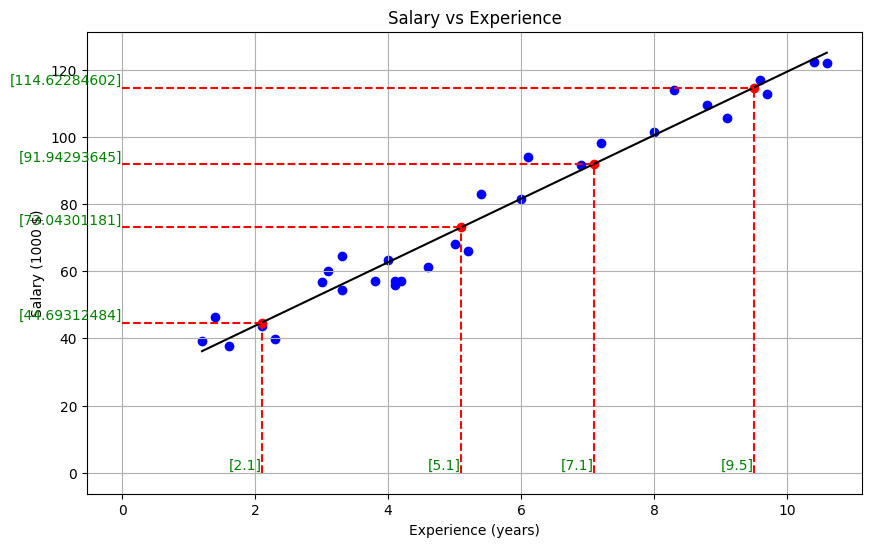

In [ ]:
# Create a figure with a size of (10,6) inches
plt.figure(figsize=(10, 6))  # Set the size of the figure to be (10,6) inches

# Generate scatter plot of experience and salary with blue dots
plt.scatter(x, y, color='blue')  # Plot experience vs salary as blue dots

# Generate scatter plot of new experiences and new salaries with red dots
plt.scatter(new_experiences, new_salaries, color='red')  # Plot new_experience vs new_salaries as red dots

# Add a black regression line
x_line = np.linspace(min(x), max(x))  # Generate an array of x values from the minimum to the maximum of experience
y_line = linear_reg.predict(np.array(x_line).reshape((-1, 1)))  # Predict y values using the linear regression model
plt.plot(x_line, y_line, color='k')  # Plot the regression line

# Add dashed lines from every red point to the point on the y and x axis
for exp, sal in zip(new_experiences, new_salaries):  # Loop over pairs of new experience and new salaries
    plt.vlines(exp, 0, sal, linestyle='dashed', colors='red')  # Plot a vertical dashed line from the x-axis up to the red point
    plt.hlines(sal, 0, exp, linestyle='dashed', colors='red')  # Plot a horizontal dashed line from the y-axis to the red point

    # plot the values on x and y axis
    plt.text(exp, 0, str(exp), color='green', ha='right', va='bottom')  # Plot the experience value as a green number at the bottom of the vertical dashed line
    plt.text(0, sal, str(sal), color='green', ha='right', va='bottom')  # Plot the salary value as a green number at the left end of the horizontal dashed line

# Add title and labels to the plot
plt.title('Salary vs Experience')  # Add a title to the plot
plt.xlabel('Experience (years)')  # Label the x-axis
plt.ylabel('Salary (1000 $)')  # Label the y-axis

# Show grid
plt.grid()  # Add a grid to the plot

# Show the plot
plt.show()  # Display the figure

#Evalutate the model

The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The smaller the Mean Squared Error, the closer the fit is to the data. In a general sense, the lower the MSE, the better. In your context, an MSE of 31 means that the model's predictions are, on average, approximately $31,000 (given the salary values are in 1000's) away from the actual values. However, understanding the MSE value in absolute terms can be challenging because it's not directly interpretable in the units of the original data, and its magnitude depends heavily on the context, including the scale of the target variables.

The Coefficient of Determination (R² or R-squared) measures the proportion of the variance in the dependent variable that the independent variables explain collectively. R² ranges from 0 to 1 (or from 0% to 100%), with 1 indicating a perfect fit. An R² of 0.96 or 96% suggests that 96% of the variance in the `Salary (1000$)` can be explained by `Experience (years)`. This is an extremely high value, indicating that the model fits the data very well and the features used in your model explain the large majority of the variation in your target variable.

Do note, a high R-squared can indicate an overfit model, especially if it coexists with a high MSE. So, you might want to examine this possibility further.

## Code Explanation

1. `y_pred = linear_reg.predict(x)`: This line uses the predict() function from the Linear Regression model to make predictions on the test set 'x'. The predictions are stored in the variable 'y_pred'.

2. `mae = mean_absolute_error(y, y_pred)`: This line calculates the Mean Absolute Error (MAE) between the actual values 'y' and the predicted values 'y_pred'. The result is stored in the variable 'mae'.

3. `print('Mean squared error: %.2f' % mae)`: This line prints the Mean Absolute Error.

4. `mse = mean_squared_error(y, y_pred)`: This line calculates the Mean Squared Error (MSE) between the actual values 'y' and the predicted values 'y_pred'. The result is stored in the variable 'mse'.

5. `print('Mean squared error: %.2f' % mse)`: This line prints the Mean Squared Error.

6. `rmse = mean_squared_error(y, y_pred, squared=False)`: This line calculates the Root Mean Squared Error (RMSE) using the actual values 'y' and the predicted values 'y_pred'. The `squared` parameter is set to False to calculate RMSE instead of MSE.

7. `print('Root mean squared error: %.2f' % rmse)`: This line prints the Root Mean Squared Error.

8. `r2 = r2_score(y, y_pred)`: This line calculates the Coefficient of Determination (R2 Score), which is a statistical measure of how close the data are to the fitted regression line. 1 represents a perfect prediction.

9. `print('Coefficient of determination R2: %.2f' % r2)`: This line prints the Coefficient of Determination.

## Code

In [ ]:
# Use the predict() function of the linear regression model to make predictions on the test set
y_pred = linear_reg.predict(x)  # Generate predictions using the model

# Calculate the mean absolute error using Scikit-learn's mean_absolute_error() function
mae = mean_absolute_error(y, y_pred)
print('Mean squared error: %.2f' % mae) # Display the mean absolute error

# Calculate the mean squared error using Scikit-learn's mean_squared_error() function
mse = mean_squared_error(y, y_pred)
print('Mean squared error: %.2f' % mse)  # Display the mean squared error

# Set the squared parameter to False to calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)  # Calculate the RMSE
print('Root mean squared error: %.2f' % rmse) # Display the root mean squared error

# Calculate the coefficient of determination (R2 score) using Scikit-learn's r2_score() function
r2 = r2_score(y, y_pred)
print('Coefficient of determination R2: %.2f' % r2) # Display the coefficient of determination

Mean squared error: 4.64
Mean squared error: 31.27
Root mean squared error: 5.59
Coefficient of determination R2: 0.96


#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

## Code Explanation

1. `poly_reg = PolynomialFeatures(degree = 5)`: This line creates a PolynomialFeatures object with degree 5. The PolynomialFeatures function generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
2. `print(f'Features before transformation{x[:5]}')`: This line prints the first 5 features before transformation to the console. The transformation isn't applied yet, so these should represent the original feature set.
3. `x_poly = poly_reg.fit_transform(x)`: This line fits the PolynomialFeatures transformer to the features `x` and then transforms `x`, reassigning the resulting polynomial feature set to `x_poly`.
4. `print(f'Features after transformation{x_poly[:5]}')`: Finally, this line prints the first 5 features after the polynomial transformation, showcasing the changes made by the transformation.

**Linear Regression** <br />
$y = wx + b$

**Polynomial Regression degree 5** <br />
$y_{poly} = w_{1}x + w_{2}x^{2} + w_{3}x^{3} + w_{4}x^{4} + w_{5}x^{5} + b$

## Code

In [ ]:
# Create a PolynomialFeatures object with degree 5
poly_reg = PolynomialFeatures(degree = 5)

print(f'Features before transformation{x[:5]}')  # Print the features before the transformation

x_poly = poly_reg.fit_transform(x)  # Carry out the polynomial transformation to a degree of 5 on the features x

print(f'Features after transformation{x_poly[:5]}')  # Print the features after the transformation

Features before transformation[[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
Features after transformation[[ 1.       1.2      1.44     1.728    2.0736   2.48832]
 [ 1.       1.4      1.96     2.744    3.8416   5.37824]
 [ 1.       1.6      2.56     4.096    6.5536  10.48576]
 [ 1.       2.1      4.41     9.261   19.4481  40.84101]
 [ 1.       2.3      5.29    12.167   27.9841  64.36343]]


## Code Explanation

1. `poly_reg_model = LinearRegression()`: This line creates an instance of the LinearRegression class from scikit-learn library and assigns it to the variable `poly_reg_model`.
2. `poly_reg_model.fit(x_poly, y)`: This line fits the linear regression model to the polynomial transformed features (`x_poly`), using the target variable (`y`). The `fit()` method of the `LinearRegression` class is used to perform this task.

## Code

In [ ]:
# Instantiate the Linear Regression model
poly_reg_model = LinearRegression()  # Create an instance of the LinearRegression class

# Fit the model to the polynomial transformed features and the target variable
poly_reg_model.fit(x_poly, y)  # Fit the model using x_poly as features and y as target variable

LinearRegression()

## Code Explanation

1. `y_pred = poly_reg_model.predict(x_poly)`: This line predicts the responses ('y') for the given explanatory variable (`x_poly`) using the trained polynomial regression model (`poly_reg_model`). The predicted response values are stored in `y_pred`.

In [ ]:
# Use the polynomial regression model to predict the response for the given explanatory variable
y_pred = poly_reg_model.predict(x_poly)

## Code Explanation

1. `y_pred = poly_reg_model.predict(x_poly)`: This line uses the `predict()` function of the polynomial regression model on the testing data to generate predictions.

2. `mae = mean_absolute_error(y, y_pred)`: This line calculates the Mean Absolute Error (MAE) between the actual target variable (`y`) and the predicted target variable (`y_pred`).

3. `print('Mean absolute error: %.2f' % mae)`: This line prints the computed MAE to 2 decimal places.

4. `mse = mean_squared_error(y, y_pred)`: This line calculates the Mean Squared Error (MSE) between the actual target variable (`y`) and the predicted target variable (`y_pred`).

5. `print('Mean squared error: %.2f' % mse)`: This line prints the computed MSE to 2 decimal places.

6. `rmse = mean_squared_error(y, y_pred, squared=False)`: This line calculates the Root Mean Squared Error (RMSE) between the actual target variable (`y`) and the predicted target variable (`y_pred`).

7. `print('Root mean squared error: %.2f' % rmse)`: This line prints the computed RMSE to 2 decimal places.

8. `r2 = r2_score(y, y_pred)`: This line calculates the coefficient of determination (R2 score) between the actual target variable (`y`) and the predicted target variable (`y_pred`).

9. `print('Coefficient of determination R2: %.2f' % r2)`: This line prints the computed R2 score to 2 decimal places.

## Code

In [ ]:
# Use the predict method on the polynomial regression model with the testing data
y_pred = poly_reg_model.predict(x_poly)

# Calculate the mean absolute error between the actual and predicted values
mae = mean_absolute_error(y, y_pred)

# Print the mean absolute error
print('Mean absolute error: %.2f' % mae)

# Calculate the mean squared error between the actual and predicted values
mse = mean_squared_error(y, y_pred)

# Print the mean squared error
print('Mean squared error: %.2f' % mse)  # Print out the computed MSE

# Calculate the root mean squared error between the actual and predicted values
rmse = mean_squared_error(y, y_pred, squared=False)

# Print the root mean squared error
print('Root mean squared error: %.2f' % rmse)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(y, y_pred)

# Print the coefficient of determination (R2 score)
print('Coefficient of determination R2: %.2f' % r2)

Mean absolute error: 4.13
Mean squared error: 24.30
Root mean squared error: 4.93
Coefficient of determination R2: 0.97


## Code Explanation

1. `new_experiences = np.array([2.1, 5.1, 7.1, 9.5]).reshape((-1, 1))`: This line creates a numpy array of new experiences and reshapes it from a 1-D array to a 2-D array using numpy's `reshape()` method.

2. `new_experiences_poly = poly_reg.transform(new_experiences)`: This line transforms the reshaped array of new experiences into polynomial features using the `transform()` method of the PolynomialFeatures instance.

3. `new_salaries = poly_reg_model.predict(new_experiences_poly)`: This line uses the `predict()` method of the linear regression model to predict new salaries based on the transformed experiences.

4. `print(new_salaries)`: This line prints those predicted salaries.

## Code

In [ ]:
# Create a new array of experiences and reshape it from 1-D to 2-D
new_experiences = np.array([2.1, 5.1, 7.1, 9.5]).reshape((-1, 1))  # Conversion of 1-D array of experiences to 2-D using reshape method

# Convert the new experiences to polynomial features
new_experiences_poly = poly_reg.transform(new_experiences)

# Predict new salaries based on the transformed new experiences
new_salaries = poly_reg_model.predict(new_experiences_poly)

# print the newly predicted salaries
print(new_salaries) # Display the values of predicted salaries

[[ 47.02504518]
 [ 71.66372986]
 [ 96.87432416]
 [113.07480157]]


## Code Explanation

1. `plt.figure(figsize=(10, 6))`: This line creates a figure with a size of (10,6) inches using Matplotlib's `figure()` function.
2. `plt.scatter(x, y, color='blue')`: This line adds blue scatter plot points for existing x and y data using Matplotlib's `scatter()` function.
3. `plt.scatter(new_experiences, new_salaries, color='red')`: This line adds red scatter plot points for `new_experiences` and `new_salaries` data.
4. `x_line = np.linspace(min(x), max(x)).reshape(-1, 1)`: This line generates evenly spaced numbers over a specified range, which is from the minimum to the maximum of x, then reshaped to a 2D array.
5. `x_line_poly = poly_reg.transform(x_line)`: This line applies the polynomial feature transform to the x data points.
6. `y_line = poly_reg_model.predict(x_line_poly)`: This line predicts the y values based on the transformed x values.
7. `plt.plot(x_line, y_line, color='k')`: This line adds the line of best fit to the figure in black color.
8. The `for loop` iteration: This is used to add red dashed lines from each point to the x and y axes.
9. `plt.text(exp, 0, str(exp), color='green', ha='right', va='bottom')` and `plt.text(0, sal, str(sal), color='green', ha='right', va='bottom')`: These lines label the points on the x and y axes in green color.
10. `plt.title('Salary vs Experience (Polynomial Regression)')`, `plt.xlabel('Experience (years)')` and `plt.ylabel('Salary (1000 $)')`: These lines add the title and the labels of the x and the y axes of the figure.
11. `plt.grid()`: This line adds a grid to the figure.
12. `plt.show()`: This line displays the figure using Matplotlib's `show()` function.

## Code

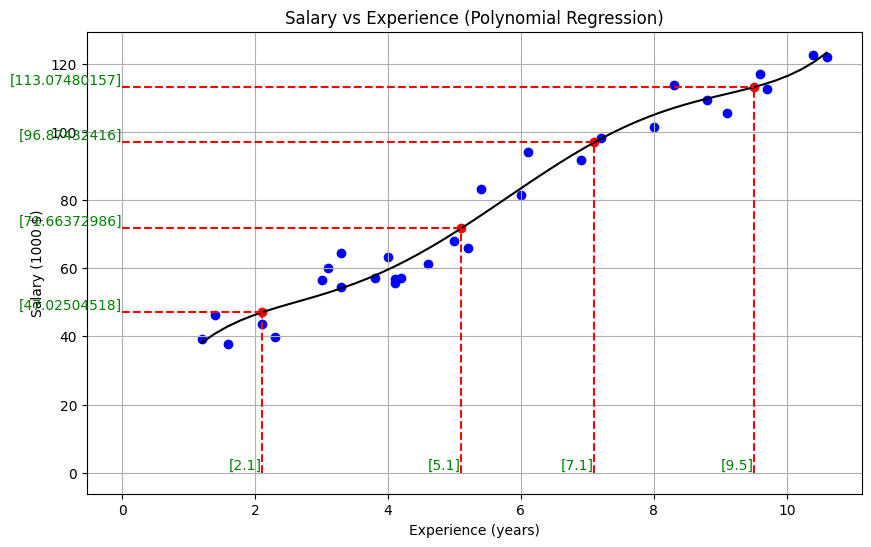

In [ ]:
# Create a new figure with a size of (10,6) inches
plt.figure(figsize=(10, 6))  # Set the size of the figure to be (10,6) inches

# Add blue scatter plot points for existing x and y data
plt.scatter(x, y, color='blue')  # Plot x and y as a scatter plot with color set to blue

# Add red scatter plot points for new_experiences and new_salaries data
plt.scatter(new_experiences, new_salaries, color='red')  # Plot new_experiences and new_salaries as a scatter plot with color set to red

# Generate coordinates for the line of best fit
x_line = np.linspace(min(x), max(x)).reshape(-1, 1)  # Generate evenly spaced points between the min and max of x
x_line_poly = poly_reg.transform(x_line)  # Apply the polynomial feature transform to the x data points
y_line = poly_reg_model.predict(x_line_poly)  # Predict the y values based on the transformed x values

# Add the line of best fit to the plot
plt.plot(x_line, y_line, color='k')  # Add the line of best fit in black

# Add red dashed lines from each point to the x and y axes
for exp, sal in zip(new_experiences, new_salaries):
    plt.vlines(exp, 0, sal, linestyle='dashed', colors='red')  # Plot vertical dashed line from point to x-axis in red
    plt.hlines(sal, 0, exp, linestyle='dashed', colors='red')  # Plot horizontal dashed line from point to y-axis in red

    # Plot the values on x and y axis
    plt.text(exp, 0, str(exp), color='green', ha='right', va='bottom')  # Plot the experience value on x-axis in green
    plt.text(0, sal, str(sal), color='green', ha='right', va='bottom')  # Plot the salary value on y-axis in green

# Add labels and title
plt.title('Salary vs Experience (Polynomial Regression)')  # Add the title to the plot
plt.xlabel('Experience (years)')  # Add the x-axis label
plt.ylabel('Salary (1000 $)')  # Add the y-axis label
plt.grid()  # Add a grid

# Display the plot
plt.show()  # Display the figure

#Fine the best degree for Polynomial Regression

## Data Normalization

The principle of data normalization (also known as feature scaling) is an important pre-processing step in machine learning that involves the standardization or normalization of feature variables. Normalization ensures that all features have a similar scale and range, which in turn, helps the machine learning algorithm learn and generalize better from the data.

For example, consider a dataset with two features: age (ranging from 0 to 100) and salary (ranging from `$20,000` to `$120,000`). Because of the large difference in magnitude, the feature 'salary' might dominate 'age', but normalization ensures that both features have an equal contribution. Feature scaling methods such as `StandardScaler` help achieve this.

When using `StandardScaler`, each feature’s mean gets subtracted and then divided by the standard deviation of the feature, resulting in a dataset with mean zero and standard deviation one; following a standard normal distribution. This effectively normalizes the spread and centering of feature values.

## Code Explanation

1. `from sklearn.preprocessing import MinMaxScaler`: This line imports the MinMaxScaler class from the sklearn.preprocessing module. The MinMaxScaler class is used for scaling features/variables between a given range (usually between 0 and 1).

2. `sc_X = MinMaxScaler()`: This line creates an instance of the MinMaxScaler class, `sc_X`, which will be used to scale the input features.

3. `sc_y = MinMaxScaler()`: This line creates another instance of the MinMaxScaler class, `sc_y`, which will be used to scale the target/dependent variable.

4. `x_norm = sc_X.fit_transform(x)`: This line normalizes (scales) the input features `x` using the `fit_transform` method of the `sc_X` instance.

5. `y_norm = sc_y.fit_transform(y.reshape(-1, 1))`: This line normalizes (scales) the target variable `y`. Before normalization, `y` is reshaped into a 2D array because the `fit_transform` method expects its input in that shape.

## Code

In [ ]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler class for input features
sc_X = MinMaxScaler()

# Instantiate the MinMaxScaler class for target variable
sc_y = MinMaxScaler()

# Normalize the input features using the fit_transform method of the instantiated object
x_norm = sc_X.fit_transform(x)

# Normalize the target variable. The reshape(-1, 1) method is used because the fit_transform method expects a 2D array
y_norm = sc_y.fit_transform(y.reshape(-1, 1))

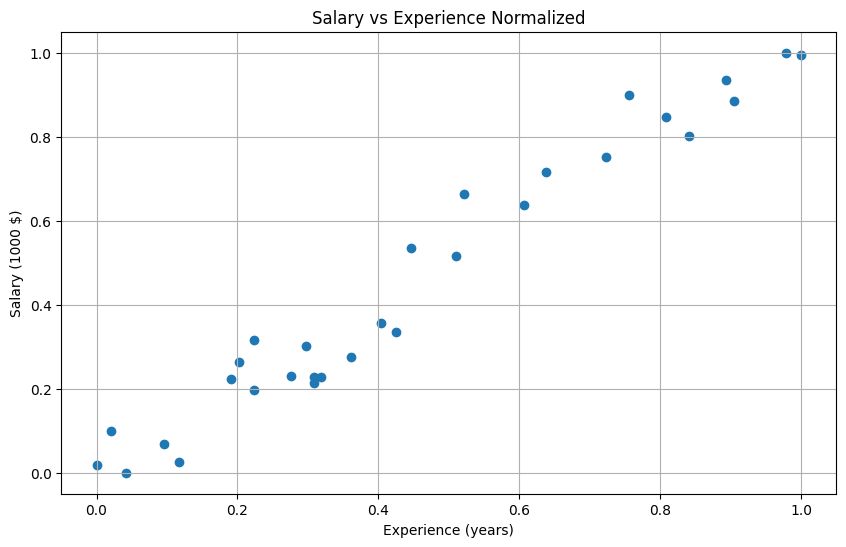

In [ ]:
# Create a scatter plot of experience vs salary normalized
plt.figure(figsize=(10, 6)) # Create a new figure with size (10, 6) inches
plt.scatter(x_norm, y_norm) # Generate scatter plot of experience vs salary
plt.title('Salary vs Experience Normalized') # Set title of the plot
plt.xlabel('Experience (years)') # Set label of x-axis
plt.ylabel('Salary (1000 $)') # Set label of y-axis
plt.grid() # Add grid to the plot
plt.show() # Display the plot

## Code Explanation

1. `X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.33, random_state=42)`: This line splits the normalized data inputs `x_norm` and outputs `y_norm` into a training set and a testing set. The testing set size is set to 33% of the total data using the `test_size=0.33` parameter. The `random_state` parameter ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

## Code

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.33, random_state=42)  # Divides the normalized data (x_norm, y_norm) into training and testing sets with a testing size of 33% of the total data

Plot the `X_train`, `y_train`, `X_test`, `y_test` instances.

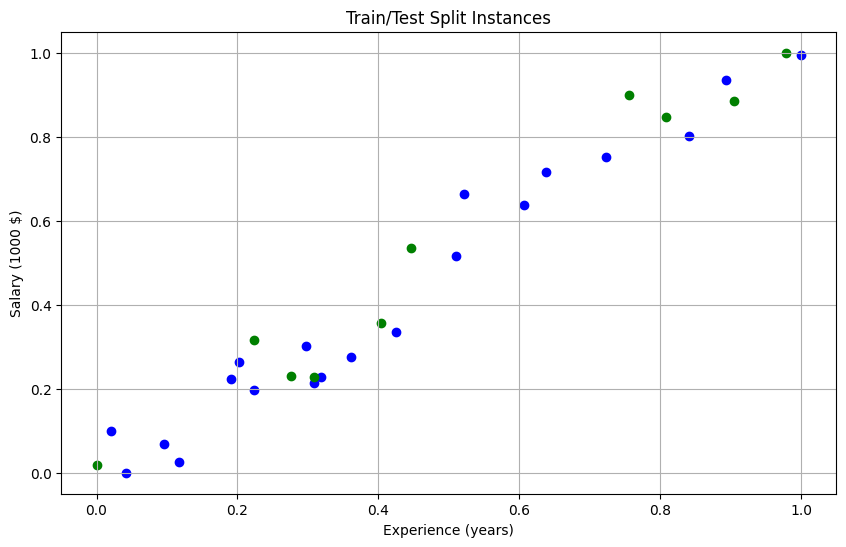

In [ ]:
plt.figure(figsize=(10, 6)) # Create a new figure with size (10, 6) inches
# Plot data points from training set using Matplotlib's scatter function
plt.scatter(X_train, y_train, color='blue')
# Plot data points from testing set using Matplotlib's scatter function
plt.scatter(X_test, y_test, color='green')
# Set title of the plot
plt.title('Train/Test Split Instances')
# Set label of x-axis
plt.xlabel('Experience (years)')
# Set label of y-axis
plt.ylabel('Salary (1000 $)')
#Plot the grid
plt.grid()
# Show the scatter plot
plt.show()

## Code Explanation

1. `degrees = [i for i in range(1, 14)]`: This line creates a list of degree values from 1 to 13 using a list comprehension.

2. `train_scores, test_scores = list(), list()`: This line initializes two lists to hold the train and test scores.

3. The `for degree in degrees:` loop begins here, and will go through each value in the degrees list.

4. `poly_reg = PolynomialFeatures(degree = degree)`: For each degree in the loop, a new PolynomialFeatures object is created with that degree.

5. `X_train_poly = poly_reg.fit_transform(X_train), X_test_poly = poly_reg.fit_transform(X_test)`: The train and test input data are transformed into polynomial features using the fitted PolynomialFeatures object.

6. `poly_reg_model = LinearRegression()`: A new Linear Regression model is created.

7. `poly_reg_model.fit(X_train_poly, y_train)`: The regression model is trained using the transformed train input and target data.

8. `y_train_pred = poly_reg_model.predict(X_train_poly)`: The target values for the train input data are predicted.

9. `train_r2 = r2_score(y_train, y_train_pred)`: The R-squared score for the predicted target values on the train data is calculated.

10. `train_scores.append(train_r2)`: The calculated R-squared score is appended to the train_scores list.

11. `y_test_pred = poly_reg_model.predict(X_test_poly)`: The target values for the test input data are predicted.

12. `test_r2 = r2_score(y_test, y_test_pred)`: The R-squared score for the predicted target values on the test data is calculated.

13. `test_scores.append(test_r2)`: The R-squared score is appended to the test_scores list.

14. `print('>%d, train: %.3f, test: %.3f' % (degree, train_r2, test_r2))`: Finally for each degree, the degree and corresponding R-squared scores for the train and test data are printed.

## Code

In [ ]:
# Create a list of degree values from 1 to 13
degrees = [i for i in range(1, 14)]  # using list comprehension

# Initialize 2 lists to hold the train and test scores
train_scores, test_scores = list(), list()

# Loop through each value in the degrees list
for degree in degrees:

  # Create a new PolynomialFeatures object with the current degree
  poly_reg = PolynomialFeatures(degree = degree)

  # Transform the train & test input data to polynomial features
  X_train_poly = poly_reg.fit_transform(X_train)
  X_test_poly = poly_reg.fit_transform(X_test)

  # Create a new Linear Regression model
  poly_reg_model = LinearRegression()

  # Fit the model with the transformed train input and target data
  poly_reg_model.fit(X_train_poly, y_train)

  # Predict the target values for train input data
  y_train_pred = poly_reg_model.predict(X_train_poly)

  # Calculate the r2 score for the train data
  train_r2 = r2_score(y_train, y_train_pred)

  # Append the score to the train scores list
  train_scores.append(train_r2)

  # Predict the target values for test input data
  y_test_pred = poly_reg_model.predict(X_test_poly)

  # Calculate the r2 score for the test data
  test_r2 = r2_score(y_test, y_test_pred)

  # Append the score to the test scores list
  test_scores.append(test_r2)

  # Print the degree and corresponding r2 scores
  print('>%d, train: %.3f, test: %.3f' % (degree, train_r2, test_r2))

>1, train: 0.955, test: 0.955
>2, train: 0.955, test: 0.955
>3, train: 0.962, test: 0.962
>4, train: 0.962, test: 0.960
>5, train: 0.964, test: 0.963
>6, train: 0.965, test: 0.964
>7, train: 0.984, test: 0.864
>8, train: 0.985, test: 0.850
>9, train: 0.985, test: 0.860
>10, train: 0.986, test: 0.898
>11, train: 0.988, test: 0.443
>12, train: 0.988, test: 0.753
>13, train: 0.988, test: 0.758


## Code Explanation

1. `plt.plot(degrees, train_scores, '-o', label='Train')`: This line creates a line plot of the training scores against degrees using Matplotlib's `plot()` function. The `-o` parameter assigns a line style of circular markers for the plot. The `label` parameter assigns the label "Train" to the plot.

2. `plt.plot(degrees, test_scores, '-o', label='Test')`: This line creates a line plot of the test scores against degrees using Matplotlib's `plot()` function similar to the previous line. The `-o` parameter assigns a line style of circular markers for the plot. The `label` parameter assigns the label "Test" to the plot.

3. `plt.title("R2 Scores for different degrees of Polynomial Regression")`: This line sets the plot's title as "R2 Scores for different degrees of Polynomial Regression" using Matplotlib's `title()` function.

4. `plt.legend()`: This line displays a legend on the plot containing labels "Train" and "Test" specified in the previous lines using Matplotlib's `legend()` function.

5. `plt.show()`: This line displays the plot using Matplotlib's `show()` function.

## Code

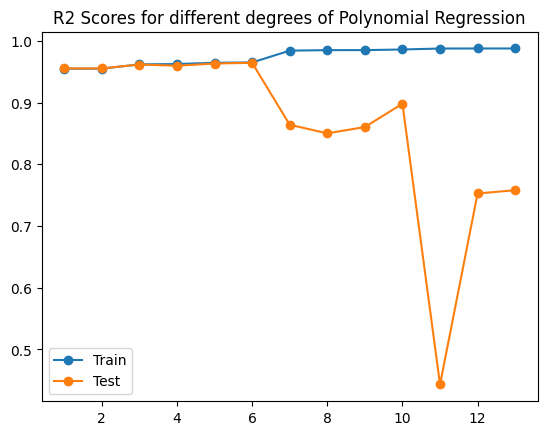

In [ ]:
plt.plot(degrees, train_scores, '-o', label='Train')  # Creates a line plot of training scores against degrees with a line style of circular markers. The plot is labeled as 'Train'
plt.plot(degrees, test_scores, '-o', label='Test')  # Creates a line plot of test scores against degrees with a line style of circular markers. The plot is labeled as 'Test'
plt.title("R2 Scores for different degrees of Polynomial Regression")  # Sets the title of the plot as 'R2 Scores for different degrees of Polynomial Regression'
plt.legend()  # Displays a legend on the plot
plt.show()  # Displays the plot